In [1]:
import re
import pandas as pd

In [2]:
f=open('WhatsApp Chat with _Boy.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
print(data)

27/01/2021, 17:01 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.,
27/10/2020," 16:45 - Kaif KAMIL created group ""6 to 7 class 11 physics ðŸ‘ðŸ»""",,,
27/01/2021, 17:01 - Kaif KAMIL added you,,,
27/01/2021, 17:06 - Kaif KAMIL: This message was deleted,,,
27/01/2021, 17:06 - Rakesh Friend 2: OK bhai,,,
27/01/2021, 17:07 - Kaif KAMIL: Kal sam ka Tuition purani gagha par hi hogi,,,
27/01/2021, 17:07 - Rakesh Friend 2: Ok,,,
28/01/2021, 17:32 - Kaif KAMIL added user3,,,
29/01/2021, 07:01 - Kaif KAMIL removed user12,,,
29/01/2021, 15:06 - ðŸ˜ƒAnik CGðŸ§ðŸ’—: Aaj kahan tuition hai,,,
29/01/2021, 15:06 - ðŸ˜ƒAnik CGðŸ§ðŸ’—: Sir ji,,,
03/02/2021, 19:31 - user4 left,,,
04/02/2021, 10:20 - Kaif KAMIL added user5,,,
04/02/2021, 16:51 - Rakesh Friend 2: <Media omitted>,,,
04/02/2021, 16:51 - Rakesh Friend 2: <Media omitted>,,,
05/02/2021, 09:20 - user11: Aaj test h kya,,,
05/02/2021, 09:42 - ðŸ˜ƒAnik

In [6]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.,\n27/10/2020," 16:45 - Kaif KAMIL created group ""6 to 7 class 11 physics ðŸ‘\x8dðŸ\x8f»""",,,\n',
 'Kaif KAMIL added you,,,\n',
 'Kaif KAMIL: This message was deleted,,,\n',
 'Rakesh Friend 2: OK bhai,,,\n',
 'Kaif KAMIL: Kal sam ka Tuition purani gagha par hi hogi,,,\n',
 'Rakesh Friend 2: Ok,,,\n',
 'Kaif KAMIL added user3,,,\n',
 'Kaif KAMIL removed user12,,,\n',
 'ðŸ˜ƒAnik CGðŸ§\x8fðŸ’—: Aaj kahan tuition hai,,,\n',
 'ðŸ˜ƒAnik CGðŸ§\x8fðŸ’—: Sir ji,,,\n',
 'user4 left,,,\n',
 'Kaif KAMIL added user5,,,\n',
 'Rakesh Friend 2: <Media omitted>,,,\n',
 'Rakesh Friend 2: <Media omitted>,,,\n',
 'user11: Aaj test h kya,,,\n',
 'ðŸ˜ƒAnik CGðŸ§\x8fðŸ’—: Of course,,,\n',
 'user3 left,,,\n',
 'user2: Kl class nhi hogi,,,\n13/03/2021," 08:23 - Kaif KAMIL changed the subject from ""6 to 7 class 11 physics ðŸ‘\x8dðŸ\x8f»"" to ""9 to 10 class 11 physics""

In [8]:
dates=re.findall(pattern,data)

In [9]:
df=pd.DataFrame({'user_message' :messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-01-27 17:01:00
1,"Kaif KAMIL added you,,,\n",2021-01-27 17:01:00
2,"Kaif KAMIL: This message was deleted,,,\n",2021-01-27 17:06:00
3,"Rakesh Friend 2: OK bhai,,,\n",2021-01-27 17:06:00
4,Kaif KAMIL: Kal sam ka Tuition purani gagha pa...,2021-01-27 17:07:00


In [10]:
df.shape

(377, 2)

In [11]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,user,message
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n"
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n"
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n"
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n"


In [12]:
df['year']=df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n",2021
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021


In [14]:
df['month']=df['date'].dt.month_name()

In [15]:
df.head()

,date,user,message,year,month
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,January
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n",2021,January
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021,January
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021,January
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021,January


In [16]:
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,January,27,17,1
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n",2021,January,27,17,1
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021,January,27,17,6
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021,January,27,17,6
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021,January,27,17,7


In [18]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [19]:
len(words)

1560

In [20]:
df[df['message']=='<Media omitted>,,,\n'].shape[0]


56

In [21]:
df

,date,user,message,year,month,day,hour,minute
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,January,27,17,1
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n",2021,January,27,17,1
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021,January,27,17,6
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021,January,27,17,6
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021,January,27,17,7
...,...,...,...,...,...,...,...,...
372,2021-12-01 18:57:00,Rakesh Friend 2,"Yd Dila diye apko notes ka,,,\n",2021,December,1,18,57
373,2021-12-01 20:39:00,user2,"<Media omitted>,,,\n",2021,December,1,20,39
374,2021-12-01 20:40:00,user2,"<Media omitted>,,,\n",2021,December,1,20,40
375,2021-12-01 20:41:00,user2,"<Media omitted>,,,\n",2021,December,1,20,41


In [26]:
x=df['user'].value_counts().head()

In [27]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

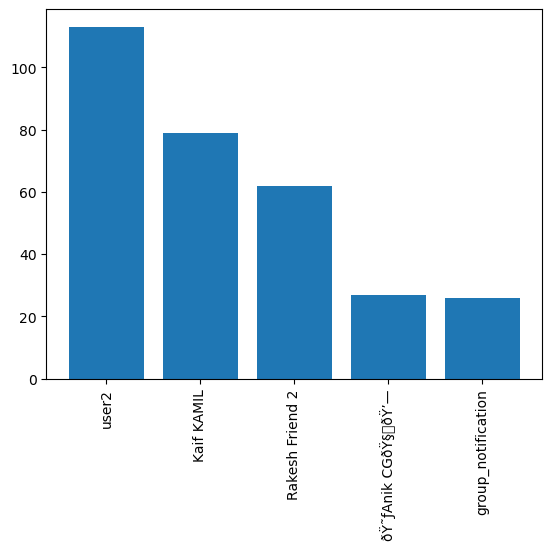

In [31]:
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show

In [38]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,user2,29.97
1,Kaif KAMIL,20.95
2,Rakesh Friend 2,16.45
3,ðŸ˜ƒAnik CGðŸ§ðŸ’—,7.16
4,group_notification,6.90
5,user5,6.10
6,Krishna Kant,6.10
7,user6,1.86
8,ðŸ˜ðŸ’•Saksham ðŸ’•ðŸ˜,1.59
9,user7,1.06


In [62]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>,,,\n']

In [63]:
temp

,date,user,message,year,month,day,hour,minute
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021,January,27,17,6
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021,January,27,17,6
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021,January,27,17,7
5,2021-01-27 17:07:00,Rakesh Friend 2,"Ok,,,\n",2021,January,27,17,7
8,2021-01-29 15:06:00,ðŸ˜ƒAnik CGðŸ§ðŸ’—,"Aaj kahan tuition hai,,,\n",2021,January,29,15,6
...,...,...,...,...,...,...,...,...
369,2021-12-01 15:19:00,user2,"Yad dila dena,,,\n",2021,December,1,15,19
370,2021-12-01 17:32:00,Kaif KAMIL,"Sir notes bhejna hai,,,\n",2021,December,1,17,32
371,2021-12-01 18:57:00,Rakesh Friend 2,"Sir note bhjye,,,\n",2021,December,1,18,57
372,2021-12-01 18:57:00,Rakesh Friend 2,"Yd Dila diye apko notes ka,,,\n",2021,December,1,18,57


In [70]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [71]:
words=[]
for messages in temp['message']:
    for word in messages.lower().split():
        if word not in stop_words:
            words.append(word)

In [76]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,55
1,"sir,,,",42
2,kl,22
3,"hogi,,,",21
4,"hai,,,",19
5,tuition,14
6,message,13
7,"deleted,,,",13
8,"ok,,,",11
9,notes,9


In [74]:
# stop word no word meaning
# remove group messsages
#remove media omitted messages
# remove stop words

In [77]:
df['month_num']=df['date'].dt.month

In [82]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [83]:
timeline

,year,month_num,month,message
0,2021,1,January,10
1,2021,2,February,7
2,2021,3,March,6
3,2021,4,April,41
4,2021,5,May,113
5,2021,6,June,28
6,2021,7,July,48
7,2021,8,August,20
8,2021,9,September,19
9,2021,10,October,28


In [93]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [96]:
timeline.shape[0]

12

In [98]:
time

['January-2021',
 'February-2021',
 'March-2021',
 'April-2021',
 'May-2021',
 'June-2021',
 'July-2021',
 'August-2021',
 'September-2021',
 'October-2021',
 'November-2021',
 'December-2021']

In [99]:
timeline['time']=time

In [100]:
timeline

,year,month_num,month,message,time
0,2021,1,January,10,January-2021
1,2021,2,February,7,February-2021
2,2021,3,March,6,March-2021
3,2021,4,April,41,April-2021
4,2021,5,May,113,May-2021
5,2021,6,June,28,June-2021
6,2021,7,July,48,July-2021
7,2021,8,August,20,August-2021
8,2021,9,September,19,September-2021
9,2021,10,October,28,October-2021


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January-2021'),
  Text(1, 0, 'February-2021'),
  Text(2, 0, 'March-2021'),
  Text(3, 0, 'April-2021'),
  Text(4, 0, 'May-2021'),
  Text(5, 0, 'June-2021'),
  Text(6, 0, 'July-2021'),
  Text(7, 0, 'August-2021'),
  Text(8, 0, 'September-2021'),
  Text(9, 0, 'October-2021'),
  Text(10, 0, 'November-2021'),
  Text(11, 0, 'December-2021')])

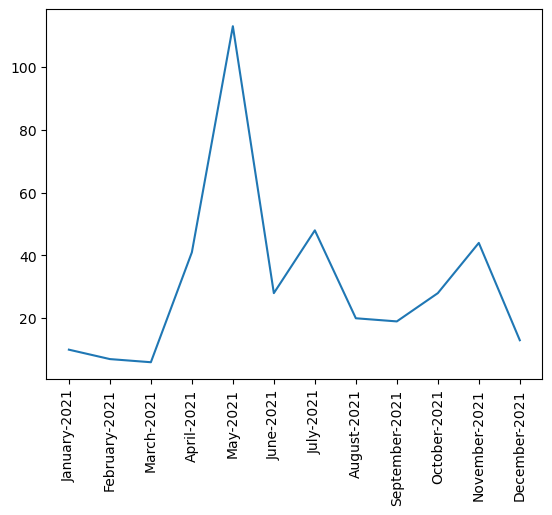

In [102]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [106]:
df['only_date']=df['date'].dt.date

In [111]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

(array([18659., 18687., 18718., 18748., 18779., 18809., 18840., 18871.,
        18901., 18932., 18962.]),
 [Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18871.0, 0, '2021-09'),
  Text(18901.0, 0, '2021-10'),
  Text(18932.0, 0, '2021-11'),
  Text(18962.0, 0, '2021-12')])

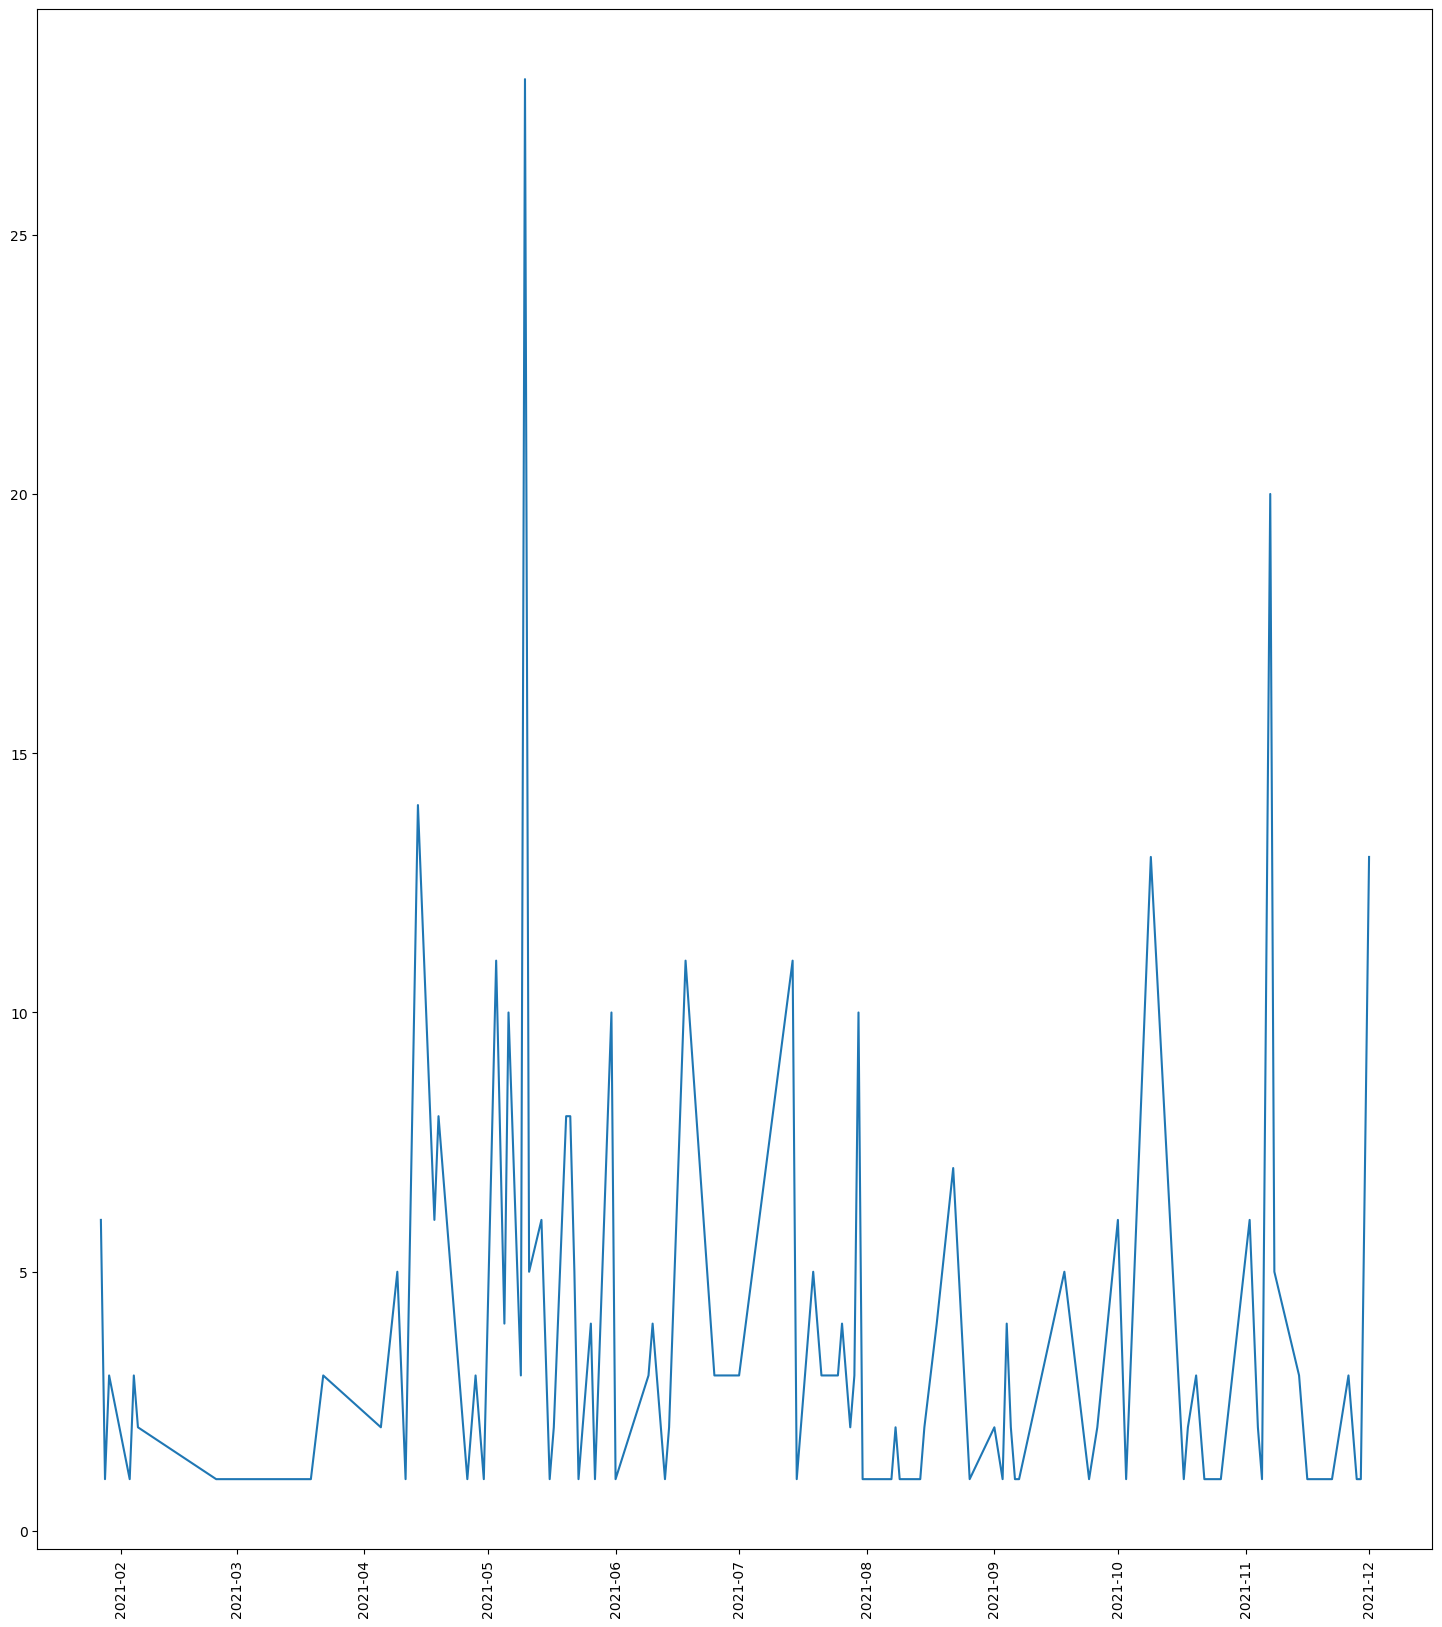

In [115]:
plt.figure(figsize=(18,20))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation='vertical')

In [117]:
df['day_name']=df['date'].dt.day_name()

In [119]:
df['day_name'].value_counts()

Monday       89
Wednesday    74
Friday       67
Sunday       60
Thursday     37
Saturday     30
Tuesday      20
Name: day_name, dtype: int64

In [120]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2021-01-27 17:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,January,27,17,1,1,2021-01-27,Wednesday
1,2021-01-27 17:01:00,group_notification,"Kaif KAMIL added you,,,\n",2021,January,27,17,1,1,2021-01-27,Wednesday
2,2021-01-27 17:06:00,Kaif KAMIL,"This message was deleted,,,\n",2021,January,27,17,6,1,2021-01-27,Wednesday
3,2021-01-27 17:06:00,Rakesh Friend 2,"OK bhai,,,\n",2021,January,27,17,6,1,2021-01-27,Wednesday
4,2021-01-27 17:07:00,Kaif KAMIL,"Kal sam ka Tuition purani gagha par hi hogi,,,\n",2021,January,27,17,7,1,2021-01-27,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
372,2021-12-01 18:57:00,Rakesh Friend 2,"Yd Dila diye apko notes ka,,,\n",2021,December,1,18,57,12,2021-12-01,Wednesday
373,2021-12-01 20:39:00,user2,"<Media omitted>,,,\n",2021,December,1,20,39,12,2021-12-01,Wednesday
374,2021-12-01 20:40:00,user2,"<Media omitted>,,,\n",2021,December,1,20,40,12,2021-12-01,Wednesday
375,2021-12-01 20:41:00,user2,"<Media omitted>,,,\n",2021,December,1,20,41,12,2021-12-01,Wednesday
